# Solution {-}

The derivative of a first order Markov process doesn't exist, however the derivative of second order Markov process does exist.

$$
S_x(j\omega) = \frac{2\sqrt{2}\omega_0^3\sigma^2}{\omega^4 + \omega_0^4} \rightarrow S_x(s) = \frac{2\sqrt{2}\omega_0^3\sigma^2}{s^4 + \omega_0^4} \\
$$

$$
s^4 + \omega_0^4 = (s^2)^2 + (\omega_0^2)^2 \rightarrow A^2 + B^2 = (A + B)^2 - 2AB
$$

$$
s^4 + \omega_0^4 = (s^2 + \omega_0^2)^2 - 2 s^2 \omega_0^2 \rightarrow A^2 - B^2 = (A + B) \cdot (A - B)
$$

$$
s^4 + \omega_0^4 = (s^2 + \omega_0^2 + \sqrt{2} s \omega_0) \cdot (s^2 + \omega_0^2 - \sqrt{2} s \omega_0)
$$

$$
S_x(s) = \frac{\sqrt{2\sqrt{2}\omega_0^3\sigma^2}}{s^2 + \sqrt{2}\omega_0 s + \omega_0^2} \cdot \frac{\sqrt{2\sqrt{2}\omega_0^3\sigma^2}}{(-s)^2 + \sqrt{2}\omega_0 (-s) + \omega_0^2}
$$

This can be demonstrated by a Monte Carlo simulation as follows:

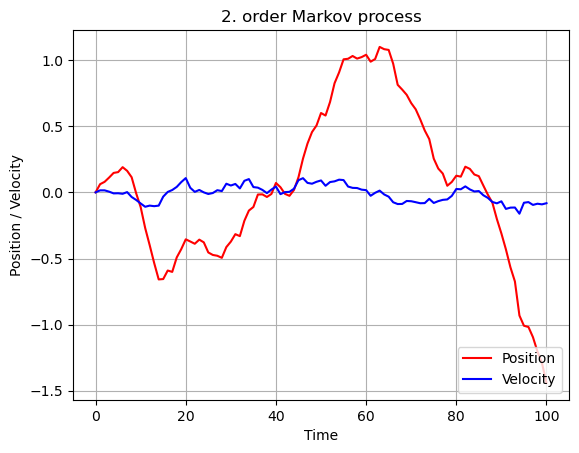

In [1]:
from numpy import array, sqrt, zeros, arange
from numpy.random import randn
from scipy.linalg import sqrtm, inv, cholesky
import matplotlib.pyplot as plt
from vanloan import numeval

dt = 1
sigma = 1
omega0 = 0.1
num = (sigma**2)*(omega0**3)*2*sqrt(2)

# Dynamic matrix
F = array([[0, 1],
           [-(omega0**2), -sqrt(2)*omega0]])

# White noise coefficients
G = array([[0],
           [sqrt(num)]])

# Van Loan
[phi, Q] = numeval(F, G, dt)

# Vector of random normal numbers
randn = randn(2, 100)

# Cholesky upper triangular
C = cholesky(Q)

w = zeros([2, 100])
x = zeros([2, 100 + 1])
t = arange(0, 100 + 1)

# Generate white noise sequence
for i in range(0, 100):
    w[:, i] = C@randn[:, i]

for j in range(0, 100):
    x[:, j + 1] = phi@x[:, j] + w[:, j]

plt.plot(t, x[0], 'r', label='Position')
plt.plot(t, x[1], 'b', label='Velocity')
plt.title('2. order Markov process')
plt.xlabel('Time')
plt.ylabel('Position / Velocity')
plt.legend(loc='lower right')
plt.grid()
plt.show()